In [22]:
import numpy as np
import pandas as pd
import torch
from torch.autograd import Variable
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [23]:
train_df = pd.read_csv("./data/train_df.csv", index_col=0)
val_df = pd.read_csv("./data/validation_df.csv", index_col=0)
test_df = pd.read_csv("./data/test_df.csv", index_col=0)

In [24]:
train_df.D.value_counts()
test_df.D.value_counts()
#val_df.D.value_counts()

D
0    5014
1    4984
Name: count, dtype: int64

In [25]:
train_df['OLIG_PROTE_CD'].unique()

array([1., 2., 3., 5., 4., 6.])

In [26]:
data = train_df.drop(['BLDS', 'D'], axis=1)
target = train_df['D']

In [27]:
data.head()

,SEX,AGE_GROUP,BP_LWST,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,BMI
0,1,11,65.0,158.0,44.0,147.0,14.0,1.0,0.0,19.0,17.0,2.0,31.020408
1,2,17,72.0,235.0,39.0,76.0,12.0,1.0,1.0,16.0,25.0,1.0,31.217482
2,2,9,83.0,260.0,67.0,107.0,13.0,1.0,0.0,17.0,15.0,1.0,18.730489
3,1,11,70.0,198.0,41.0,137.0,14.0,1.0,0.0,17.0,20.0,3.0,27.681661
4,2,9,82.0,157.0,45.0,129.0,12.0,1.0,0.0,9.0,22.0,1.0,33.203125


In [28]:
target.head()
target.value_counts()

D
1    31756
0    31750
Name: count, dtype: int64

In [29]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score


X_train, X_test, y_train, y_test = train_test_split(data, target ,test_size=0.1, stratify=target)
xgb_model = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=0.8, max_depth=7)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

57155 6351


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

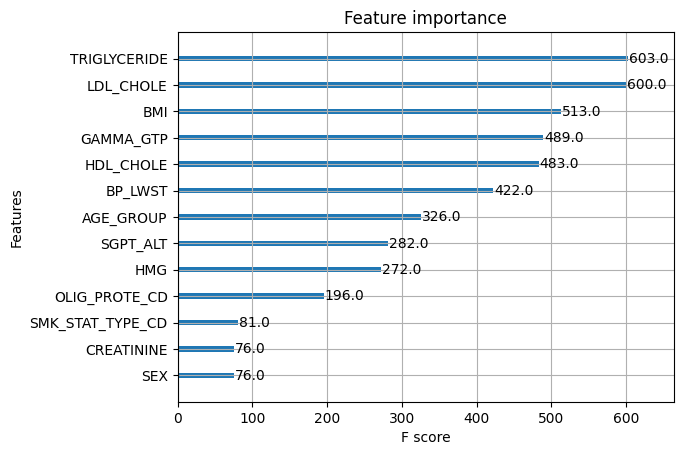

In [30]:
xgboost.plot_importance(xgb_model)

In [31]:
predictions = xgb_model.predict(X_test)
predictions

array([0, 1, 1, ..., 1, 1, 0])

In [32]:
predictions.sum()

2905

In [33]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(predictions,y_test))

0.9558043915667921
0.8163741942315318


In [34]:
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [35]:
rg = MLPClassifier(solver = "adam", hidden_layer_sizes = 100, random_state = 1)
rg.fit(X_train,y_train)
rg.predict(X_test)
r_sq = rg.score(X_train,y_train)
print(r_sq)

0.9186947773598111


In [36]:
len(predictions)
len(y_test)

6351

In [37]:
cm = confusion_matrix(y_test, predictions)
print(cm)

# Calculate the accuracy.
accuracy = metrics.accuracy_score(y_test, predictions)

# Calculate the precision.
precision = metrics.precision_score(y_test, predictions)

# Calculate the recall.
recall = metrics.recall_score(y_test, predictions)

# Calculate the F1 score.
f1_score = metrics.f1_score(y_test, predictions)

# Print the results.
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

[[3160   15]
 [ 286 2890]]
Accuracy: 0.9526058888364037
Precision: 0.9948364888123924
Recall: 0.9099496221662469
F1 score: 0.9505015622430522


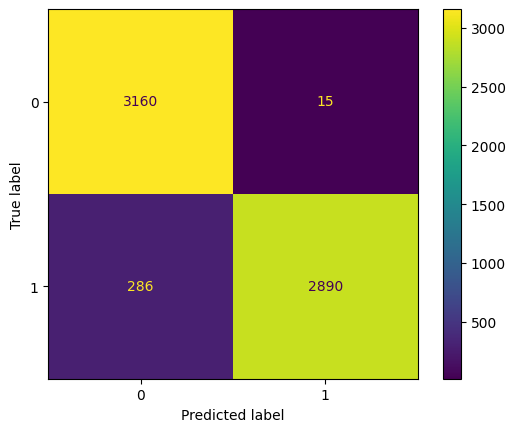

In [38]:
# Confusion Matrix 시각화
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot()
plt.show()